In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

df = pd.concat([train, test], axis=0)

In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
print(train.shape, test.shape)

(8693, 14) (4277, 13)


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
100*(df.isnull().sum()/df.count())

PassengerId      0.000000
HomePlanet       2.270935
CryoSleep        2.448657
Cabin            2.359719
Destination      2.158160
Age              2.125984
VIP              2.335490
RoomService      2.069725
FoodCourt        2.279000
ShoppingMall     2.416298
Spa              2.238688
VRDeck           2.109904
Name             2.319344
Transported     49.200506
dtype: float64

In [7]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)
train[['HomePlanet', 'Cabin', 'Destination']] = train[['HomePlanet', 'Cabin', 'Destination']].fillna('None')
train[['CryoSleep', 'VIP']] = train[['CryoSleep', 'VIP']].fillna(False)
train[['RoomService','FoodCourt', 'Spa', 'VRDeck',  'Age', 'ShoppingMall']] = train[['RoomService','FoodCourt', 'Spa', 'VRDeck',  'Age', 'ShoppingMall']].fillna(0)

test[['HomePlanet', 'Cabin', 'Destination']] = test[['HomePlanet', 'Cabin', 'Destination']].fillna('None')
test[['CryoSleep', 'VIP']] = test[['CryoSleep', 'VIP']].fillna(False)
test[['RoomService','FoodCourt', 'Spa', 'VRDeck', 'Age', 'ShoppingMall']] = test[['RoomService','FoodCourt', 'Spa', 'VRDeck',  'Age', 'ShoppingMall']].fillna(0)

df = pd.concat([train, test], axis=0)

In [8]:
100*(train.isnull().sum()/train.count())

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
dtype: float64

<Axes: xlabel='Transported', ylabel='count'>

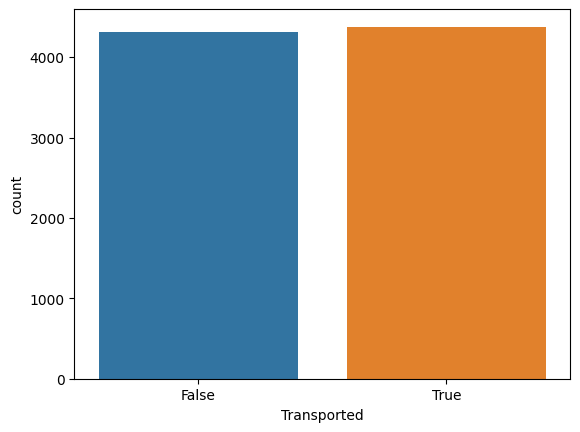

In [9]:
# Going into Univariate analysis

# Starting with target label

sns.countplot(df, x='Transported')

<Axes: xlabel='HomePlanet', ylabel='count'>

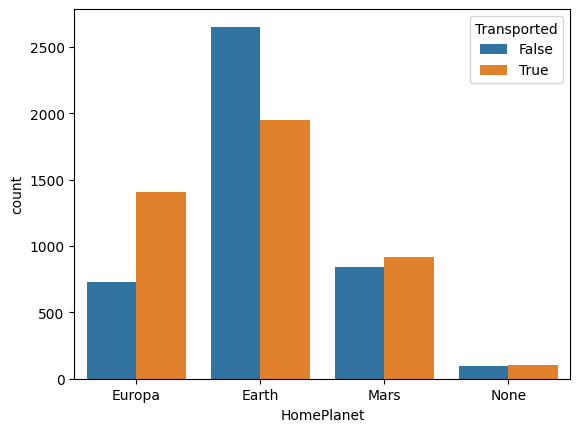

In [10]:
sns.countplot(df, x='HomePlanet', hue='Transported')

<Axes: xlabel='CryoSleep', ylabel='count'>

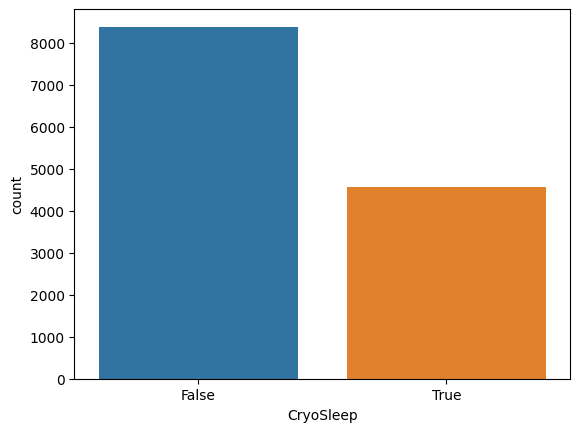

In [11]:
sns.countplot(df, x='CryoSleep')

<Axes: xlabel='CryoSleep', ylabel='count'>

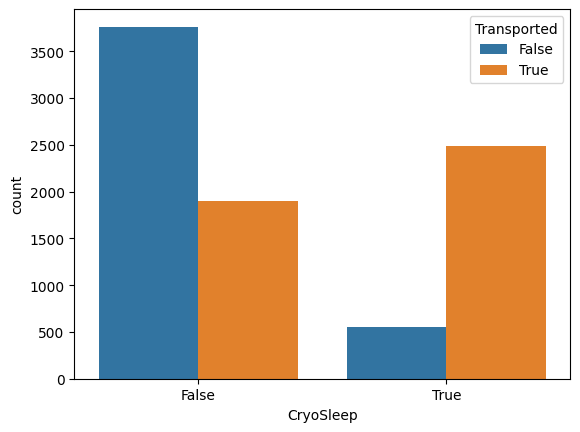

In [12]:
sns.countplot(df, x='CryoSleep', hue='Transported')

In [13]:
df['Cabin'].head(5)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [14]:
df['Cabin_side'] = df['Cabin'].apply(lambda x: x[-1])
df['Cabin_deck'] = df['Cabin'].apply(lambda x: x[0])

train['Cabin_side'] = train['Cabin'].apply(lambda x: str(x)[-1])
test['Cabin_side'] = test['Cabin'].apply(lambda x: str(x)[-1])

train['Cabin_deck'] = train['Cabin'].apply(lambda x: str(x)[0])
test['Cabin_deck'] = test['Cabin'].apply(lambda x: str(x)[0])

<Axes: xlabel='Cabin_side', ylabel='count'>

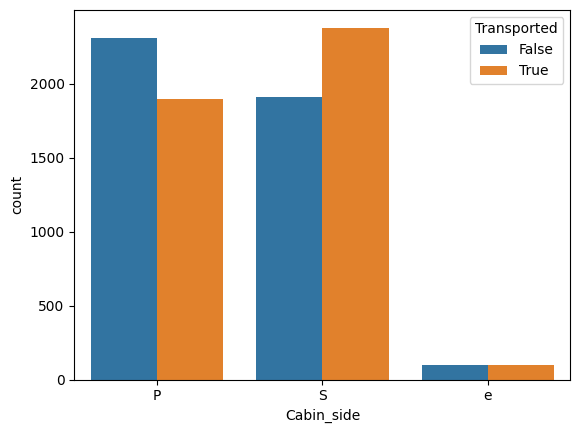

In [15]:
sns.countplot(df, x='Cabin_side', hue='Transported')

<Axes: xlabel='Cabin_deck', ylabel='count'>

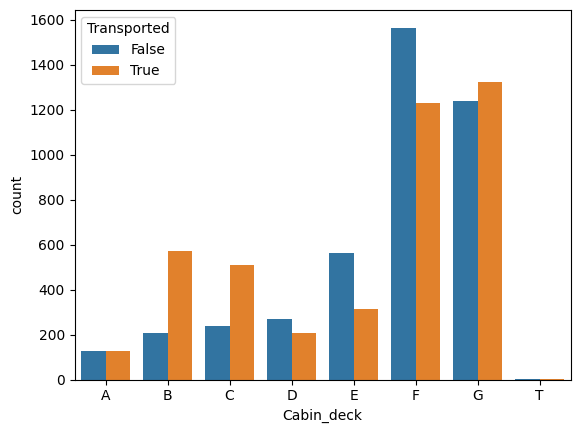

In [16]:
sns.countplot(df, x='Cabin_deck', hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [17]:
del df['Cabin_deck']

In [18]:
df.groupby('Destination').count()['PassengerId']

Destination
55 Cancri e      2641
None              274
PSO J318.5-22    1184
TRAPPIST-1e      8871
Name: PassengerId, dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

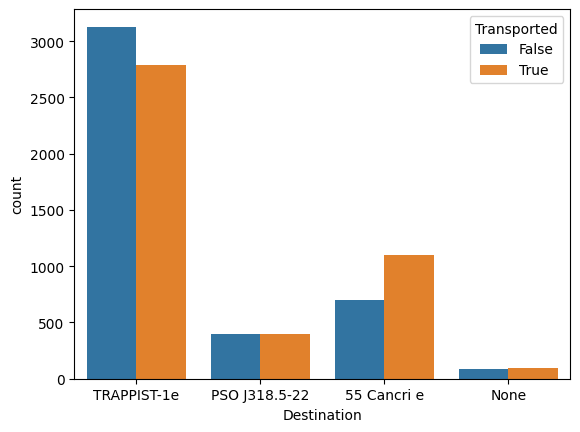

In [19]:
sns.countplot(df, x='Destination', hue='Transported')

In [20]:
df[['Transported','Age']].groupby('Transported').mean()['Age']

Transported
False    29.305678
True     27.178392
Name: Age, dtype: float64

<Axes: xlabel='Transported', ylabel='Age'>

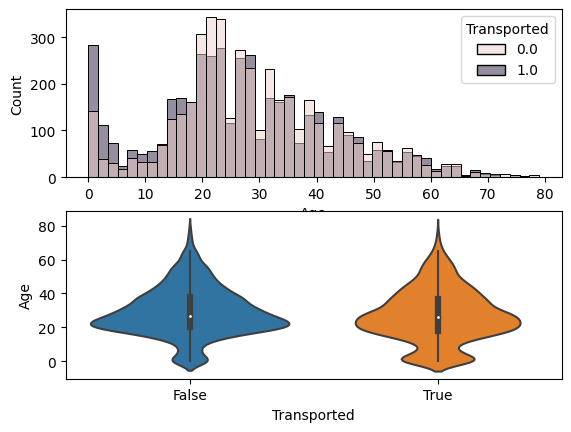

In [21]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
sns.histplot(data=df, hue='Transported', x='Age', ax=ax1)

ax2 = fig.add_subplot(2,1,2)
sns.violinplot(data=df, x='Transported', y='Age', ax=ax2)


<Axes: xlabel='Age', ylabel='Count'>

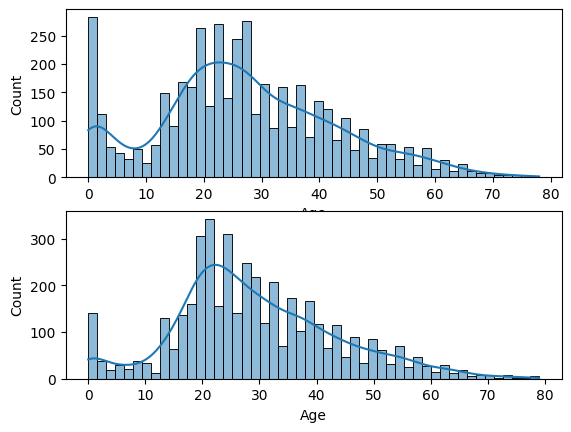

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
sns.histplot(data=df[df['Transported']==True], x='Age', ax=ax1, bins=50, kde=True)

ax2 = fig.add_subplot(2,1,2)
sns.histplot(data=df[df['Transported']==False], x='Age', ax=ax2, bins=50, kde=True)

<Axes: xlabel='VIP', ylabel='count'>

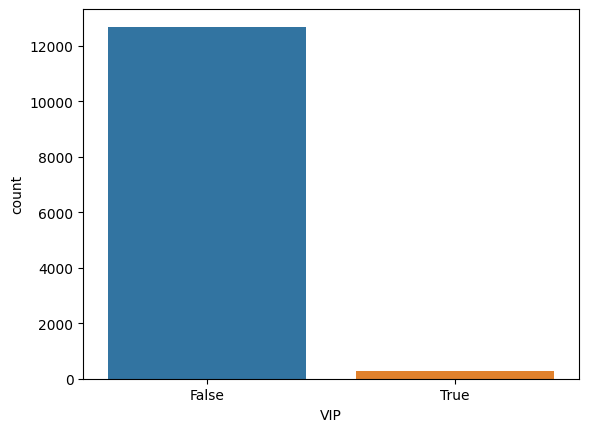

In [23]:
sns.countplot(df, x='VIP')

<Axes: xlabel='VIP', ylabel='count'>

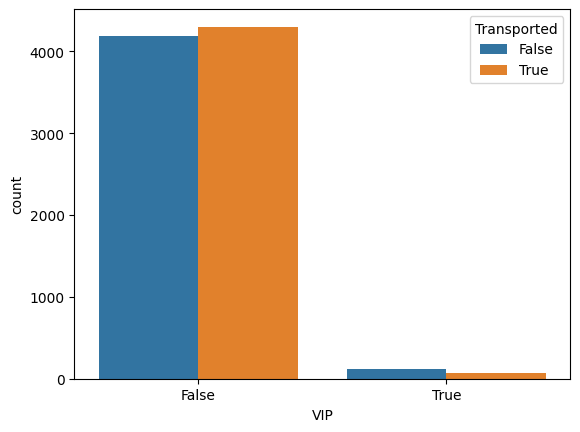

In [24]:
sns.countplot(df, x='VIP', hue='Transported')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


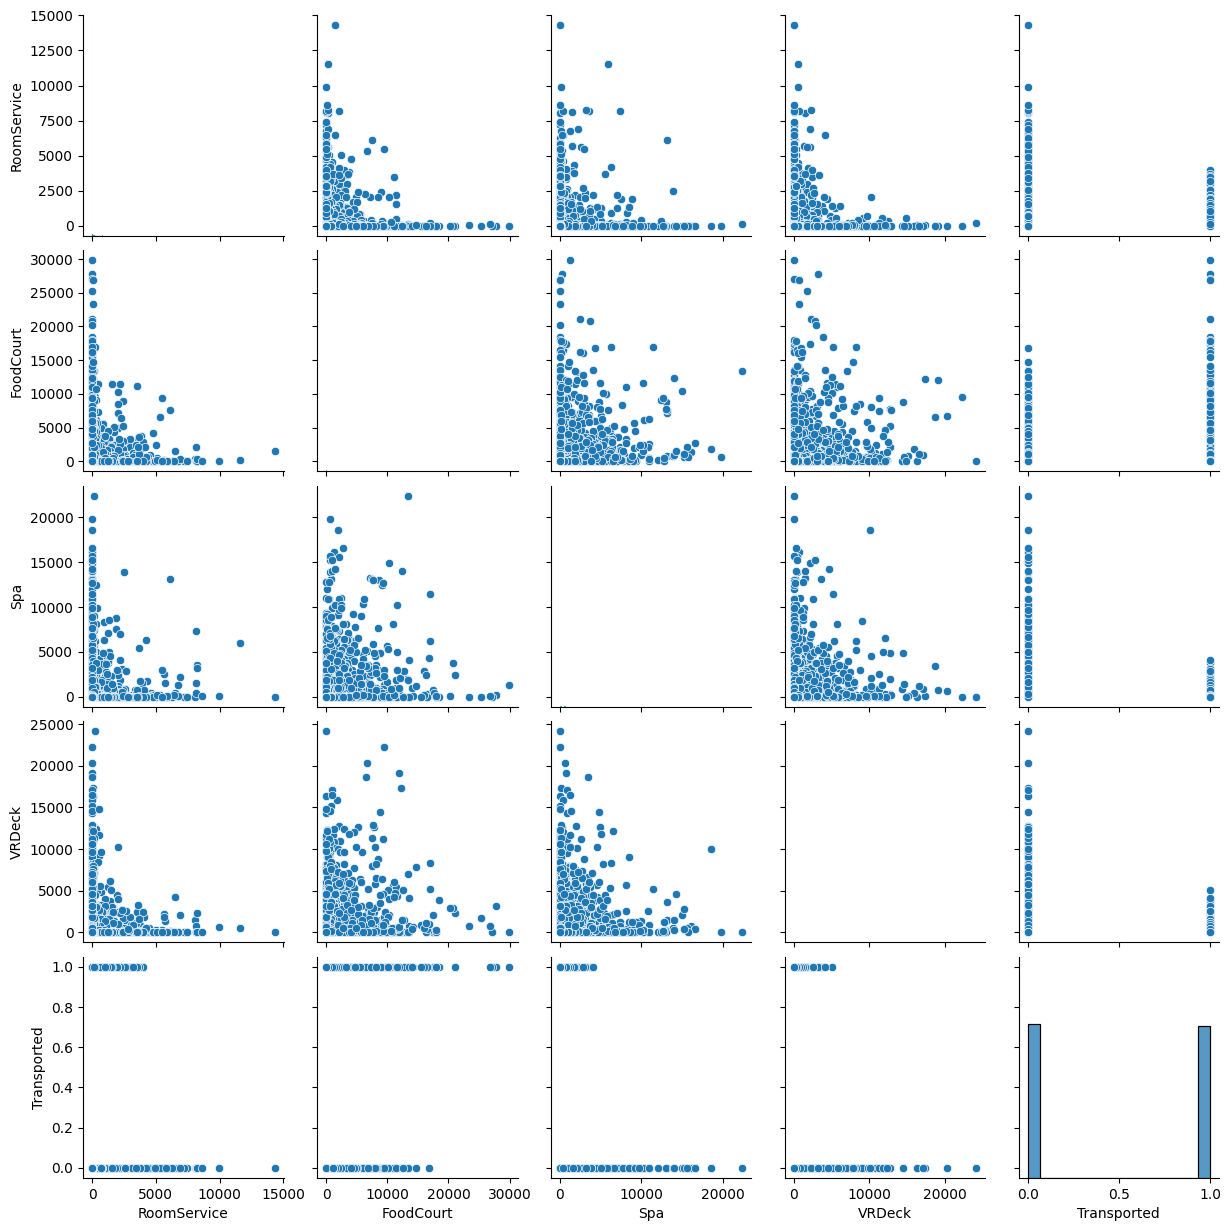

In [25]:
cont_df = df[['RoomService','FoodCourt', 'Spa', 'VRDeck', 'Transported']]
sns.pairplot(cont_df)
# df['Spa'].plot(kind='kde')
# df['VRDeck'].plot(kind='kde')

In [26]:
# Select features before creating dummies

train_model = train[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age',
               'Cabin_side','Cabin_deck', 'RoomService','FoodCourt', 'Spa', 'VRDeck', 'Transported']]

test_model = test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age',
               'Cabin_side', 'Cabin_deck', 'RoomService','FoodCourt', 'Spa', 'VRDeck']]

In [27]:
# Convert all dummy variables from categprical 
train_model = pd.get_dummies(train_model, columns=['HomePlanet', 'Destination', 'Cabin_side', 'Cabin_deck'], drop_first=True)
test_model = pd.get_dummies(test_model, columns=['HomePlanet', 'Destination', 'Cabin_side', 'Cabin_deck'], drop_first=True)

In [28]:
print(df.columns.tolist())
train_model.head()

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_side']


,PassengerId,CryoSleep,Age,RoomService,FoodCourt,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_side_S,Cabin_side_e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_N,Cabin_deck_T
0,0001_01,False,39.0,0.0,0.0,0.0,0.0,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,0002_01,False,24.0,109.0,9.0,549.0,44.0,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,0003_01,False,58.0,43.0,3576.0,6715.0,49.0,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,0003_02,False,33.0,0.0,1283.0,3329.0,193.0,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,0004_01,False,16.0,303.0,70.0,565.0,2.0,True,False,False,...,True,False,False,False,False,False,True,False,False,False


In [29]:
train_clean = train_model
test_clean = test_model

In [30]:
print(train_model.shape, test_model.shape)

(8693, 24) (4277, 23)


In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
X_train = train_model.drop(['PassengerId', 'Transported'], axis=1) 
X_test = test_model.drop(['PassengerId'], axis=1)
y_train = train_model['Transported']

In [33]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train.shape

(8693, 22)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Design your NN model

model = Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics='accuracy')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [37]:
model.fit(x=X_train_scaled, y=y_train, epochs=180, callbacks=[early_stop])

Epoch 1/180
272/272 [==============================] - 2s 2ms/step - loss: 0.6784 - accuracy: 0.5640
Epoch 2/180
272/272 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6348
Epoch 3/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6748
Epoch 4/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.6967
Epoch 5/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7023
Epoch 6/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7159
Epoch 7/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7212
Epoch 8/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7266
Epoch 9/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7313
Epoch 10/180
272/272 [==============================] - 0s 2ms/step - loss: 0.5089 - accura

<Axes: >

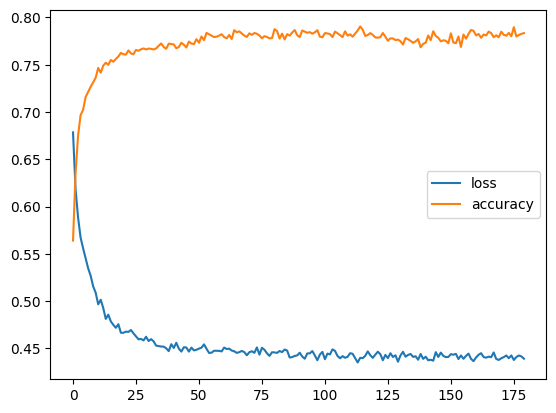

In [38]:
# Plot the loss chart
pd.DataFrame(model.history.history).plot()

In [39]:
threshold = 0.5

predictions_test = np.where(model.predict(X_test_scaled)>threshold, 1,0)
predictions_train = np.where(model.predict(X_train_scaled)>threshold,1,0)

272/272 [==============================] - 0s 1ms/step


In [40]:
from sklearn.metrics import classification_report

print('Train metrics')
print(classification_report(y_train, predictions_train))

# print('Test metrics')
# print(classification_report(y_test, predictions_test))

Train metrics
              precision    recall  f1-score   support

       False       0.83      0.77      0.80      4315
        True       0.79      0.84      0.81      4378

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693



In [41]:
model.save('ap_titanic_spaceship_fiasco_nn_model.h5')

import pickle as pkl

with open('scaler_ap_titanic_spaceship_fiasco_nn_model_v2.skl', 'wb') as f:
    pkl.dump(scaler, f)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:

test_results = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Transported': np.where(predictions_test>0.5, 'True', 'False').reshape(-1)})

In [43]:
test_results.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

In [44]:
test_results.to_csv('ap_final_submission_v5.csv', index=False)

In [45]:
test_results.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [46]:
test_results.count()

PassengerId    4277
Transported    4277
dtype: int64